<a href="https://colab.research.google.com/github/afipolinema/PCVK_Genap_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
def convertToRGB(image):
    return cv.cvtColor(image, cv.COLOR_BGR2RGB)

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


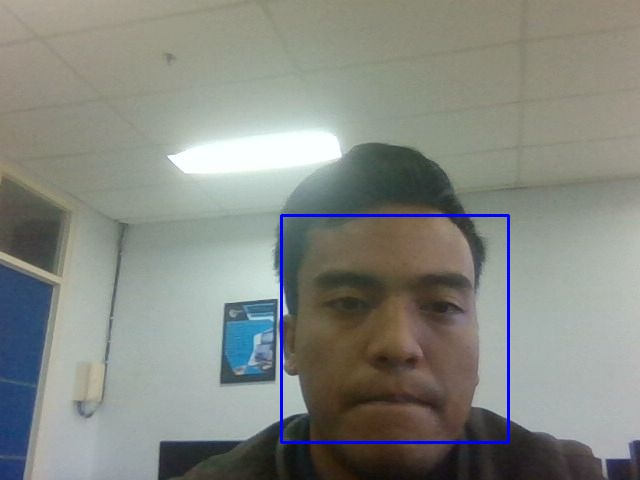

In [ ]:
# Face Detection
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv.imdecode(jpg_as_np, flags=1)

  return img


def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64decode(iobuf.getvalue()), 'utf-8')))
  return bbox_to_bytes

face_cascade = cv.CascadeClassifier(cv.samples.findFile(cv.data.haarcascades + 'haarcascade_frontalface_default.xml'))

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality){
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  faces = face_cascade.detectMultiScale(gray)
  for(x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2)
  
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

<Figure size 100x200 with 0 Axes>

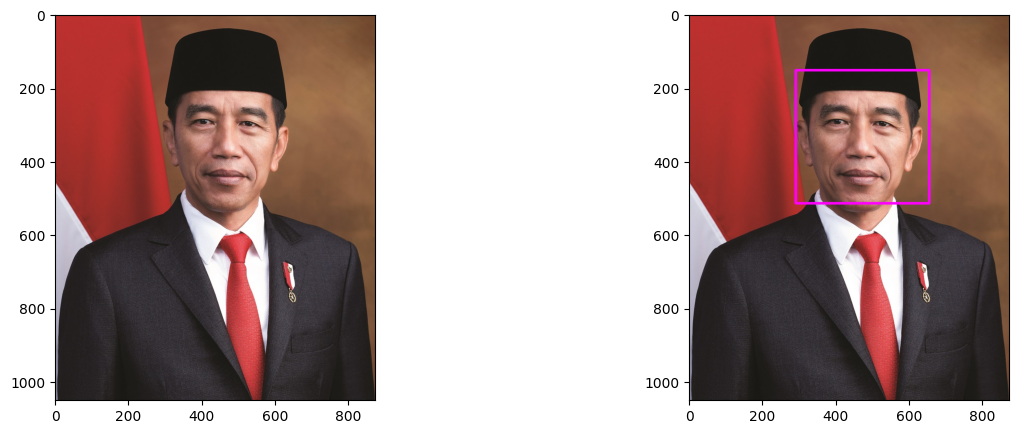

<Figure size 1000x1000 with 0 Axes>

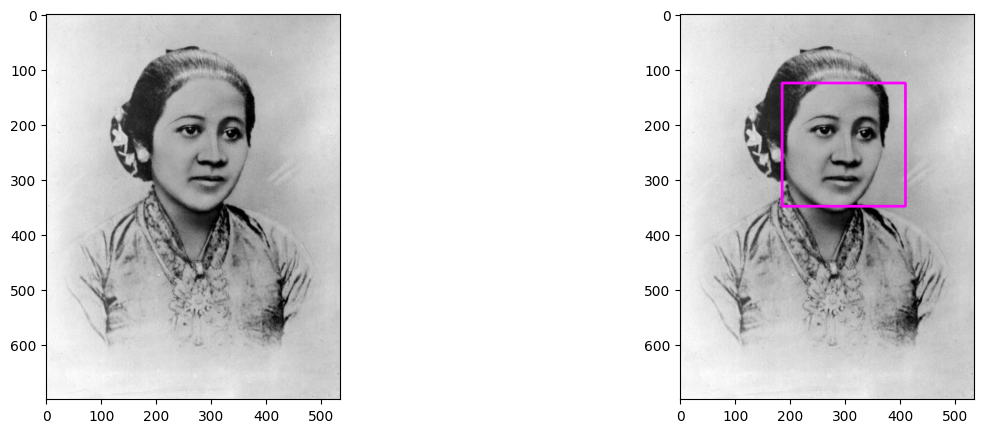

<Figure size 1000x1000 with 0 Axes>

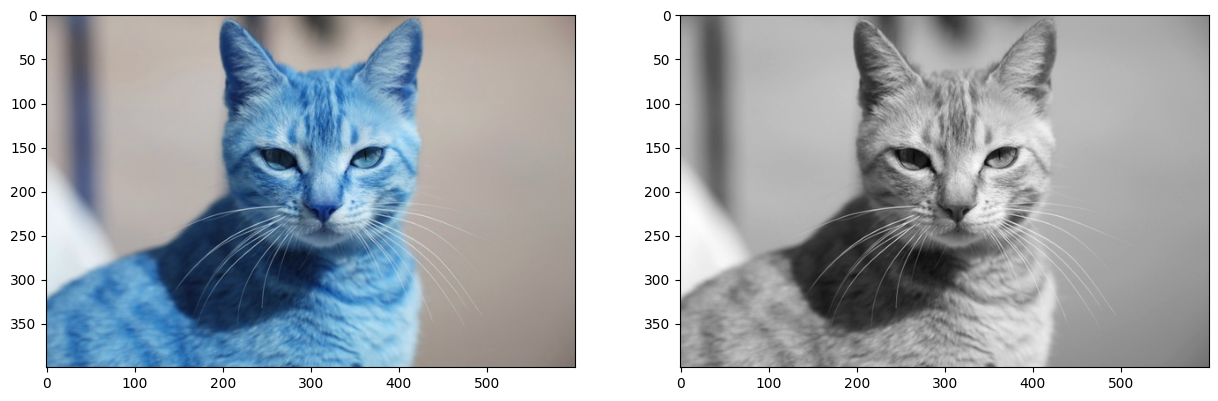

<Figure size 1000x1000 with 0 Axes>

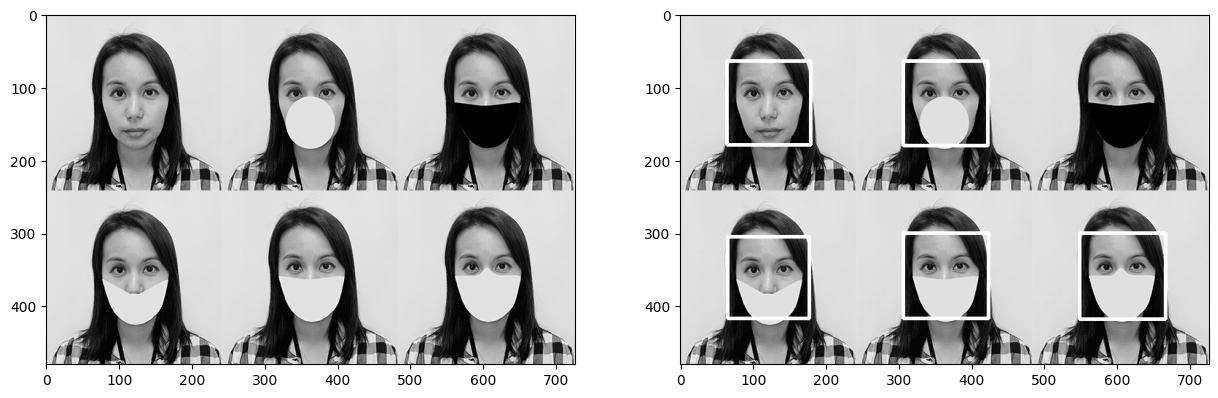

<Figure size 1000x1000 with 0 Axes>

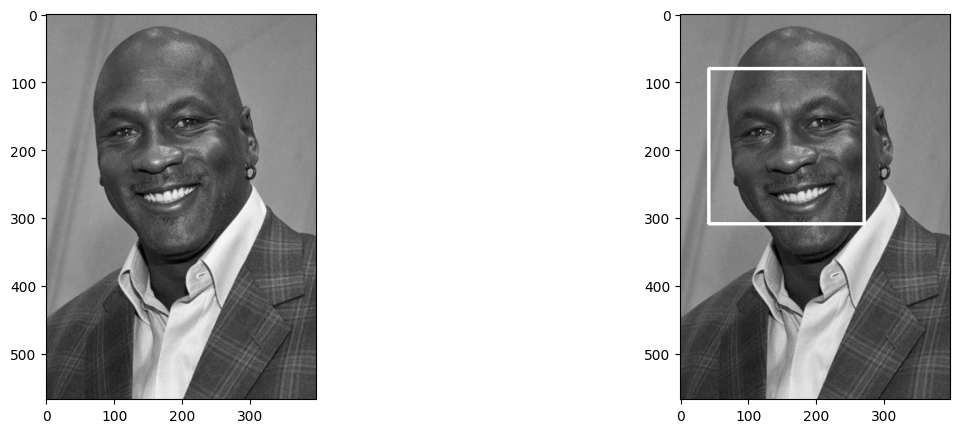

<Figure size 1000x1000 with 0 Axes>

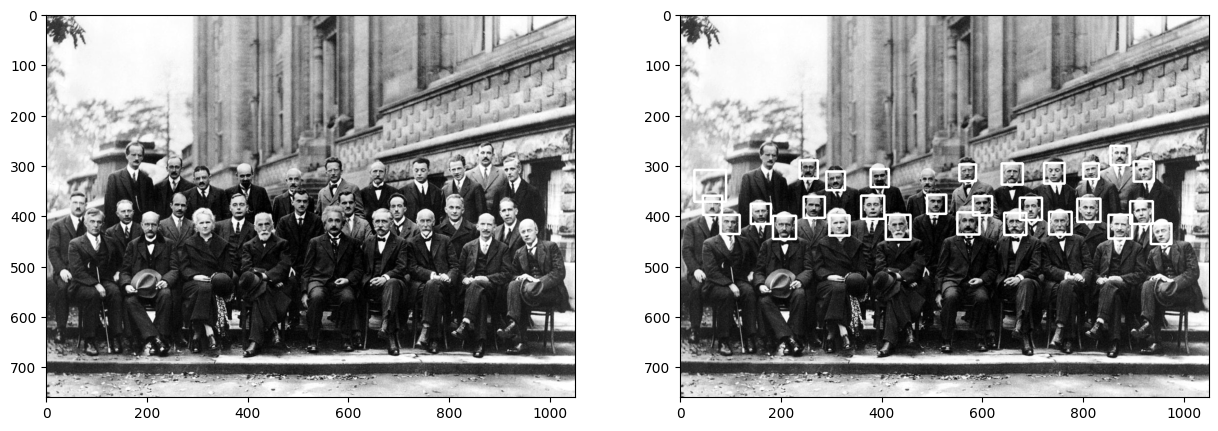

In [20]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Week12/haarcascade_frontalface_alt.xml')

jokowi = cv.imread('/content/drive/MyDrive/Week12/jokowi.jpg')
jokowi1 = cv.imread('/content/drive/MyDrive/Week12/jokowi.jpg')
roi_wajah1 = cascade_wajah.detectMultiScale(jokowi1) 

roi_wajah = cascade_wajah.detectMultiScale(jokowi) 
for(x,y,w,h) in roi_wajah: 
 cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,0,255),5) 
plt.figure(figsize = (1,2)) 

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(jokowi1, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(jokowi1, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
plt.show()

kartini = cv.imread('/content/drive/MyDrive/Week12/kartini.jpg')
kartini1 = cv.imread('/content/drive/MyDrive/Week12/kartini.jpg')
roi_wajah1 = cascade_wajah.detectMultiScale(kartini1) 

roi_wajah = cascade_wajah.detectMultiScale(kartini) 
for(x,y,w,h) in roi_wajah: 
 cv.rectangle(kartini,(x,y),(x+w,y+h),(255,0,255),3) 
plt.figure(figsize = (10,10)) 

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(kartini1, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(kartini1, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(kartini, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(kartini, cv.COLOR_BGR2RGB))
plt.show()

kucing = cv.imread('/content/drive/MyDrive/Week12/mycat.jpg')
kucing1 = cv.imread('/content/drive/MyDrive/Week12/mycat.jpg')

kucing_ori = cv.cvtColor(kucing, cv.COLOR_RGB2GRAY)
kucing2= cv.cvtColor(kucing1, cv.COLOR_BGR2GRAY)


roi_wajah = cascade_wajah.detectMultiScale(kucing1)
for (x,y,w,h) in roi_wajah: 
  cv.rectangle(kucing1,(x,y),(x+w,y+h),(255,255,255),3) 
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(kucing, cmap='gray')
plt.subplot(122),plt.imshow(kucing2, cmap='gray')
plt.show()

mask = cv.imread('/content/drive/MyDrive/Week12/mask.png',0)
mask1 = cv.imread('/content/drive/MyDrive/Week12/mask.png',0)

roi_wajah = cascade_wajah.detectMultiScale(mask1)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(mask1,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(mask, cmap='gray')
plt.subplot(122),plt.imshow(mask1, cmap='gray')
plt.show()

jordan = cv.imread('/content/drive/MyDrive/Week12/mjordan.jpg',0)
jordan1 = cv.imread('/content/drive/MyDrive/Week12/mjordan.jpg',0)

roi_wajah = cascade_wajah.detectMultiScale(jordan1)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(jordan1,(x,y),(x+w,y+h),(255,0,255),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(jordan, cmap='gray')
plt.subplot(122),plt.imshow(jordan1, cmap='gray')
plt.show()

fotbar = cv.imread('/content/drive/MyDrive/Week12/solvayconf.jpg',0)
fotbar1 = cv.imread('/content/drive/MyDrive/Week12/solvayconf.jpg',0)

roi_wajah = cascade_wajah.detectMultiScale(fotbar1)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(fotbar1,(x,y),(x+w,y+h),(255,0,255),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(fotbar, cmap='gray')
plt.subplot(122),plt.imshow(fotbar1, cmap='gray')
plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7fd7cf1c7910>)

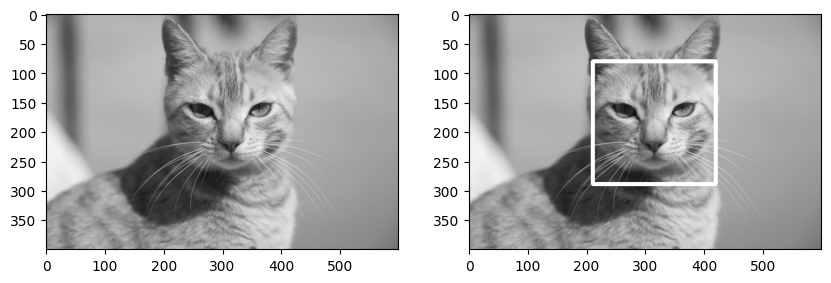

In [13]:
cascade_kocheng = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalcatface.xml")

pus = cv.imread('/content/drive/MyDrive/Week12/mycat.jpg',0)
pus1 = cv.imread('/content/drive/MyDrive/Week12/mycat.jpg',0)
woi_kocheng = cascade_kocheng.detectMultiScale(pus1)
for(x,y,w,h) in woi_kocheng:cv.rectangle(pus1,(x,y),(x+w,y+h),(255,255,255),5)
f, axarr = plt. subplots(1,2,figsize=(10,10))
plt.subplot(121),plt.imshow(convertToRGB(pus))
plt.subplot(122),plt.imshow(convertToRGB(pus1))

(<Axes: >, <matplotlib.image.AxesImage at 0x7fd7cae10550>)

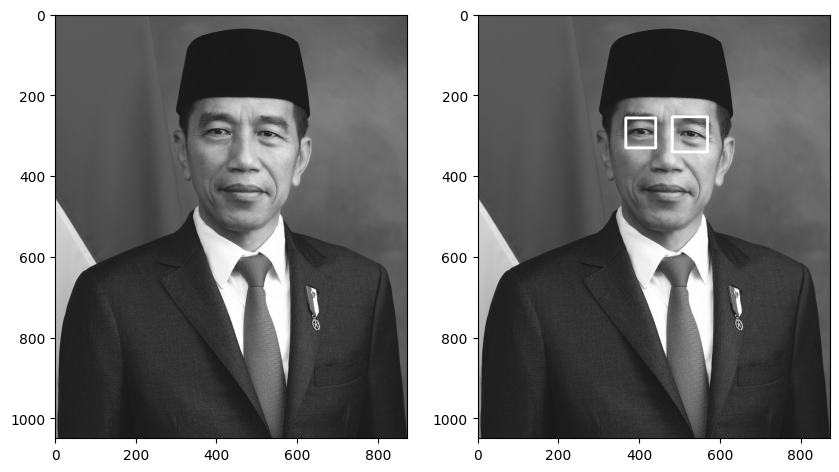

In [22]:
cascade_owi = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_eye.xml")

owi = cv.imread('/content/drive/MyDrive/Week12/jokowi.jpg',0)
owi1 = cv.imread('/content/drive/MyDrive/Week12/jokowi.jpg',0)
woi_eye = cascade_owi.detectMultiScale(owi1)
for(x,y,w,h) in woi_eye:cv.rectangle(owi1,(x,y),(x+w,y+h),(255,255,255),5)
f, axarr = plt. subplots(1,2,figsize=(10,10))
plt.subplot(121),plt.imshow(convertToRGB(owi))
plt.subplot(122),plt.imshow(convertToRGB(owi1))

<ipython-input-24-c60332073d97>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


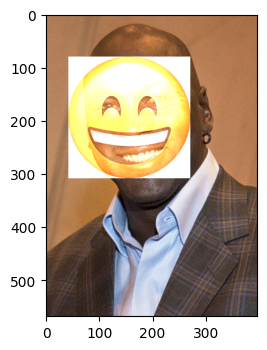

In [24]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Week12/haarcascade_frontalface_alt.xml')
img = cv.imread('/content/drive/MyDrive/Week12/mjordan.jpg')
smile = cv.imread('/content/drive/MyDrive/Week12/smile.png', cv.IMREAD_UNCHANGED)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
faces = cascade_wajah.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces:
    smile_resized = cv.resize(smile, (w, h))
    img[y:y+h, x:x+w] = cv.addWeighted(img[y:y+h, x:x+w], 1, smile_resized[:, :, 0:3], 1, 0)

f, axarr = plt. subplots(figsize=(6,6))
plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

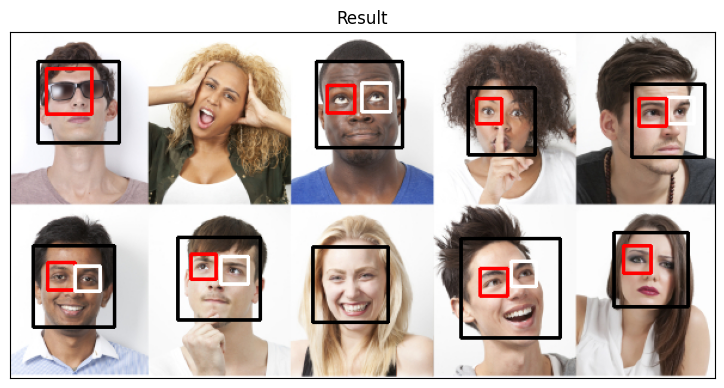

In [29]:
input_image = cv.imread('/content/drive/MyDrive/Week12/people.jpg')
gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Week12/haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces:
    cv.rectangle(input_image, (x, y), (x+w, y+h), (0, 0, 0), 2)

    roi_gray = gray_image[y:y+h, x:x+w]
    eye_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Week12/haarcascade_eye.xml')
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)

    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(input_image, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 0, 255), 2)

        if ex + ew/2 > w/2:
            cv.rectangle(input_image, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (255, 255, 255), 2)

plt.figure(figsize=(20, 20))
plt.subplot(122), plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))
plt.title('Result'), plt.xticks([]), plt.yticks([])
plt.show()
